1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to graphically display the regions.
* Use `scipy.optimize.minimize()`, trying its optional arguments.

Global Minimum Found:
Coordinates: [0. 0.]
Function Value: 0.0


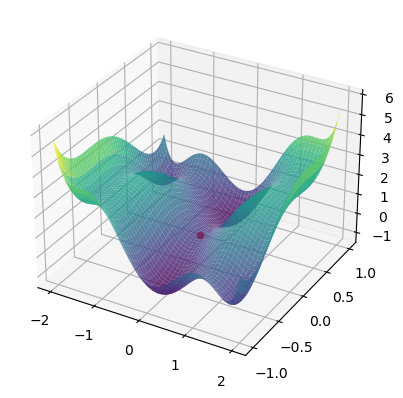

In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Define the six-hump camelback function
def six_hump_camelback(x):
    return (4 - 2.1 * x[0]**2 + x[0]**4 / 3) * x[0]**2 + x[0] * x[1] + (-4 + 4 * x[1]**2) * x[1]**2

# Set up the search space
x_range = np.linspace(-2, 2, 400)
y_range = np.linspace(-1, 1, 200)
X, Y = np.meshgrid(x_range, y_range)
Z = six_hump_camelback([X, Y])

# Plot the function surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Find global minima using scipy.optimize.minimize
initial_guess = [0, 0]
result = minimize(six_hump_camelback, initial_guess, bounds=((-2, 2), (-1, 1)))

# Print the results
print("Global Minimum Found:")
print("Coordinates:", result.x)
print("Function Value:", result.fun)

# Plot the global minimum point on the surface plot
ax.scatter(result.x[0], result.x[1], result.fun, color='red', marker='o', label='Global Minimum')

# Display the plot
plt.show()


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion of a forced pendulum, as a function of the angle $\theta$ with the vertical, is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \frac{g}{l}\sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs by defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \frac{g}{l}\sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $l = 10$, $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a period of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

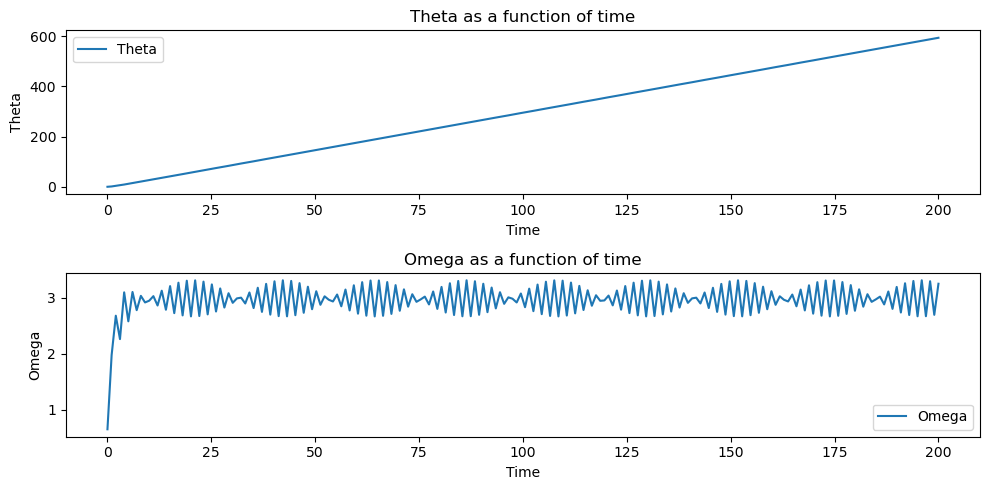

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Function that returns the derivatives of theta and w
def pendulum_equations(y, t, Q, g, l, d, omega):
    theta, w = y
    dydt = [w, (-1/Q) * w + (g/l) * np.sin(theta) + d * np.cos(omega * t)]
    return dydt

# Set initial conditions and parameters
theta0 = 0.0
w0 = 0.65
initial_conditions = [theta0, w0]

l = 10.0
Q = 2.0
d = 1.5
omega = 0.0  # Assuming omega is zero for simplicity
g = 9.8

# Time grid
t = np.linspace(0, 200, 200)

# Solve the ODE using odeint
solution = odeint(pendulum_equations, initial_conditions, t, args=(Q, g, l, d, omega))

# Extract theta and w from the solution
theta, w = solution.T

# Plot theta as a function of time
plt.figure(figsize=(10, 5))
plt.subplot(2, 1, 1)
plt.plot(t, theta, label='Theta')
plt.title('Theta as a function of time')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.legend()

# Plot omega as a function of time
plt.subplot(2, 1, 2)
plt.plot(t, w, label='Omega')
plt.title('Omega as a function of time')
plt.xlabel('Time')
plt.ylabel('Omega')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one downloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

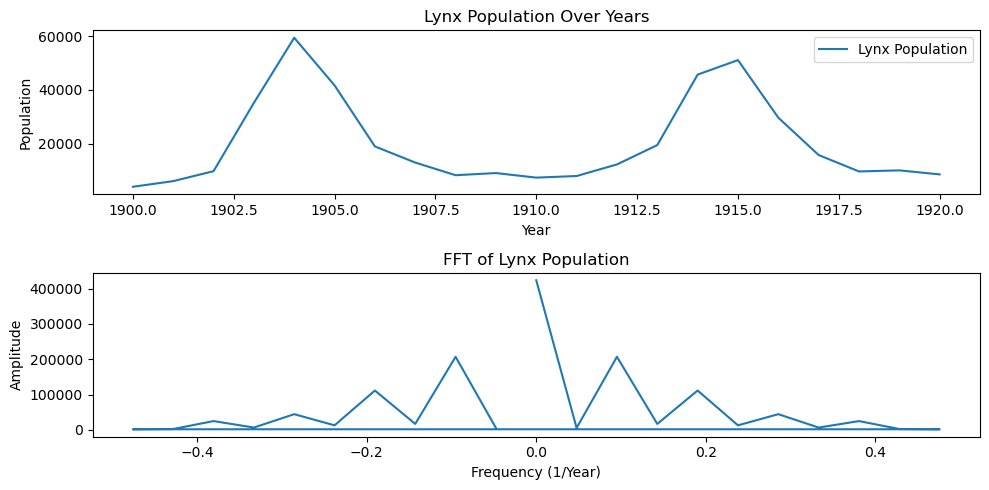

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = np.loadtxt('data/populations.txt', skiprows=1)
years = data[:, 0]
lynx_population = data[:, 2]

# Compute the FFT
fft_result = np.fft.fft(lynx_population)
fft_freq = np.fft.fftfreq(len(lynx_population), years[1] - years[0])  # Frequency axis

# Find the peak frequency
peak_freq_index = np.argmax(np.abs(fft_result))
peak_freq = np.abs(fft_freq[peak_freq_index])

# Plot the original data and the FFT result
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(years, lynx_population, label='Lynx Population')
plt.title('Lynx Population Over Years')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(fft_freq, np.abs(fft_result))
plt.title('FFT of Lynx Population')
plt.xlabel('Frequency (1/Year)')
plt.ylabel('Amplitude')

# Check if peak_freq is non-zero before plotting the vertical line
if peak_freq != 0:
    plt.axvline(x=peak_freq, color='r', linestyle='--', label=f'Peak Frequency: {1/peak_freq:.2f} Years')
    plt.legend()

plt.tight_layout()
plt.show()


4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the 2D regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

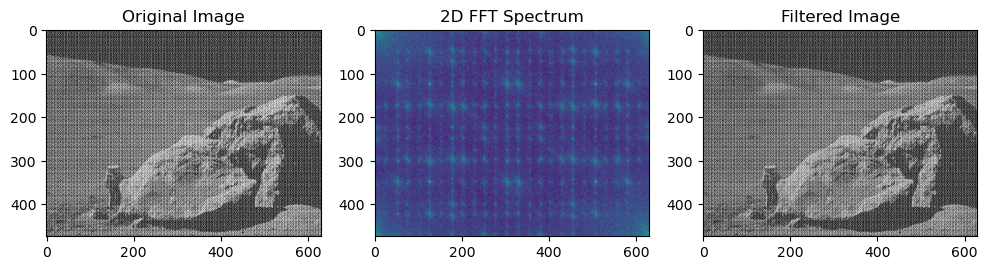

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.fftpack import fft2, ifft2

# Load the moonlanding image
image = plt.imread("images/moonlanding.png")

# Display the original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

# Perform 2D FFT
image_fft = fft2(image)

# Plot the spectrum in log scale
plt.subplot(1, 3, 2)
plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5), cmap='viridis')
plt.title('2D FFT Spectrum')

# Identify and remove periodic noise
# You may need to adjust the indices based on your inspection of the spectrum
noise_indices = np.s_[20:80, 180:240]  # Example indices for noise regions
image_fft[noise_indices] = 0

# Apply inverse Fourier transform
filtered_image = np.abs(ifft2(image_fft))

# Display the filtered image
plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

plt.tight_layout()
plt.show()
